In [1]:
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier

In [5]:
titanic_train = pd.read_csv('/content/train.csv')
titanic_test = pd.read_csv('/content/test.csv')

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


drawing plots to have more information about the dataset

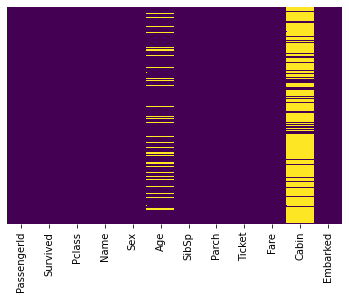

In [ ]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# removing null values

we can see that alot of age and cabin info are missing
so we need to look further into them inorder to see how they affect the survival rate

first we binarize cabin so that: 
having cabin information=1
not having cabin information=0

In [7]:
#binarizing the 'Cabin' coloumn in train and test data set

titanic_train['Cabin']=(titanic_train['Cabin'].notnull()).astype('int')
titanic_test['Cabin']=(titanic_test['Cabin'].notnull()).astype('int')
titanic_test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S


We want to fill in missing age data.
age is probably related to passenger class, we will find the realtionship using a boxplot

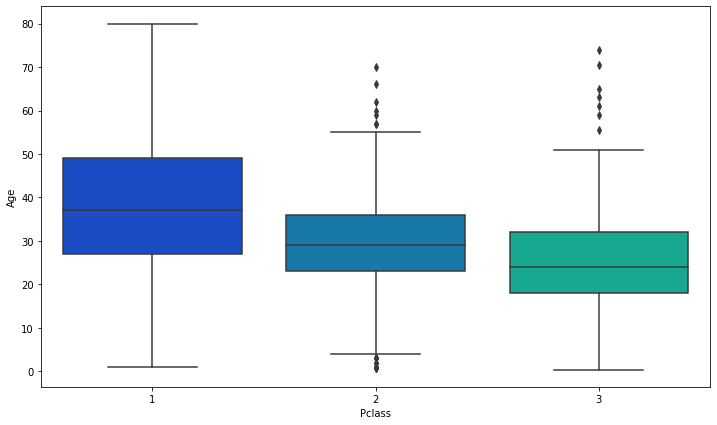

In [8]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=titanic_train,palette='winter')

We can see that passengers in the higher classes tend to be older so we'll use these average age values to impute based on Pclass for Age.
So we'll fil la class1 passenger's age with 37, a class2 passenger's age with 29 and a class3 passenger's age with 24

In [9]:

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

applying the function

In [10]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(impute_age,axis=1)
titanic_test['Age'] = titanic_test[['Age','Pclass']].apply(impute_age,axis=1)

after removing the null values from Age and Cabin,let's check the heatmap again

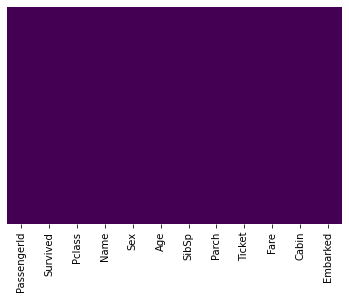

In [11]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

removing null values form Fare by guessing the fare using the Pclass

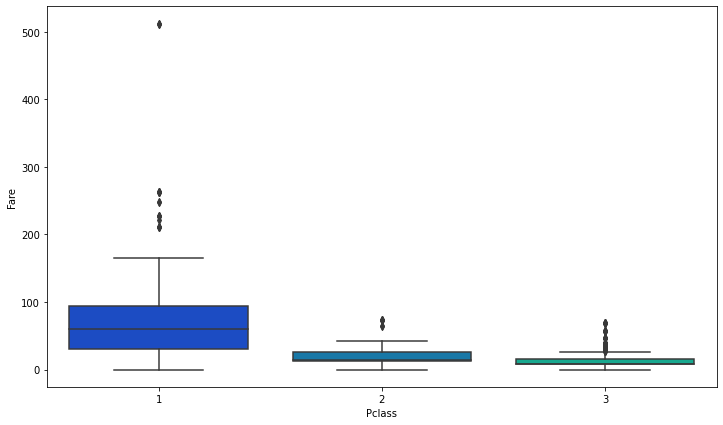

In [13]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Fare',data=titanic_train,palette='winter')

In [14]:
def impute_fare(cols):
    Fare = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Fare):
        if Pclass == 1:
            return 60
        elif Pclass == 2:
            return 15
        else:
            return 10
    else:
        return Fare

In [15]:
titanic_train['Fare'] = titanic_train[['Fare','Pclass']].apply(impute_fare,axis=1)
titanic_test['Fare'] = titanic_test[['Fare','Pclass']].apply(impute_fare,axis=1)


now we need to see how to guess the null values in Embarked

I used countplots of embarked with the other features after mapping embarked values with integers and I can conclude that replacin null values in Embaerked with S is good option

In [16]:
titanic_train["Embarked"].fillna("S", inplace = True) 
titanic_test["Embarked"].fillna("S", inplace = True)

# **now we need to convert the categorical features**

in the 'Sex' coloumn,we replace male with 0 and female with 1

In [17]:
titanic_train['Sex'] = titanic_train['Sex'].map({'male': 0,'female': 1})
titanic_test['Sex'] = titanic_test['Sex'].map({'male': 0,'female': 1})

In [18]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,S


in the 'Embarked' coloumn we replace Q with 0,S with 1 and C with 2

In [19]:
mymap = {'Q':0, 'S':1, 'C':2}

#titanic_train['Embarked']=titanic_train['Embarked'].applymap(lambda s: mymap.get(s) if s in mymap else s)
#titanic_test['Embarked']=titanic_test['Embarked'].applymap(lambda t: mymap.get(t) if t in mymap else t)
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="Q",value="0")
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="S",value="1")
titanic_train['Embarked']=titanic_train['Embarked'].replace(to_replace="C",value="2")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="Q",value="0")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="S",value="1")
titanic_test['Embarked']=titanic_test['Embarked'].replace(to_replace="C",value="2")


In [20]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,1


In [21]:
print(titanic_test['Embarked'].isnull().sum())
titanic_train.head()

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,1


for ticket and name

In [22]:
#dropping name

titanic_train.drop(['Name'],axis=1,inplace=True)
titanic_test.drop(['Name'],axis=1,inplace=True)


In [23]:
#dropping Ticket
titanic_train.drop(['Ticket'],axis=1,inplace=True)
titanic_test.drop(['Ticket'],axis=1,inplace=True)

In [24]:
#dropping passengerID
train2=titanic_train.copy()
train2.drop(['PassengerId'],axis=1,inplace=True)



## training and classification

feature selection

In [25]:
#split dataset in features and target variable
feature_cols = ['PassengerId', 'Pclass', 'Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
x= titanic_train[feature_cols] # Features
f2=['Pclass', 'Sex','Age','SibSp','Parch','Fare','Cabin','Embarked']
#x2= train2[f2] # Features
y = titanic_train['Survived'] # Target variable

splitting the dataset to testset and train set

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% test

# criterion1

creating a desicion tree model with the entropy criterion and max_depth=3

In [ ]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy",max_depth=3)

# Train Decision Tree Classifer
s1=time.time()
clf = clf.fit(x_train,y_train)
e1=time.time()

#Predict the response for test dataset
ts1=time.time()
y_pred = clf.predict(x_test)
te1=time.time()
# Model Accuracy, how often is the classifier correct?
print(" Entropy with max_depth 3 Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(" train time:",e1-s1)
print(" test time:",te1-ts1)

 Entropy with max_depth 3 Accuracy: 0.8044692737430168
 train time: 0.0043048858642578125
 test time: 0.0016760826110839844


visualizing the desicion tree

### criterion2

creating a desicion tree model with gini criterion, max_depth=3 and random splitter

In [ ]:
# Create Decision Tree classifer object
clf2 = DecisionTreeClassifier(criterion="gini",splitter="random",max_depth=3)

# Train Decision Tree Classifer
s2=time.time()
clf2 = clf2.fit(x_train,y_train)
e2=time.time()

#Predict the response for test dataset
ts2=time.time()
y_pred2 = clf2.predict(x_test)
te2=time.time()
# Model Accuracy, how often is the classifier correct?
print(" GINI with max-depth 3 and random splitter Accuracy:",metrics.accuracy_score(y_test, y_pred2))
print(" train time:",e2-s2)
print(" test time:",te2-ts2)

 GINI with max-depth 3 and random splitter Accuracy: 0.770949720670391
 train time: 0.002546072006225586
 test time: 0.003065824508666992


visualizing

# #criterion 3

gini criterion and max depth 6

In [ ]:
# Create Decision Tree classifer object
clf3 = DecisionTreeClassifier(criterion="gini",max_depth=6)

# Train Decision Tree Classifer
s3=time.time()
clf3 = clf3.fit(x_train,y_train)
e3=time.time()
#Predict the response for test dataset
ts3=time.time()
y_pred3 = clf3.predict(x_test)
te3=time.time()
# Model Accuracy, how often is the classifier correct?
print(" GINI Accuracy with  max depth=6 :",metrics.accuracy_score(y_test, y_pred3))
print("train time:",e3-s3)
print("test time:",te3-ts3)

 GINI Accuracy with  max depth=6 : 0.776536312849162
train time: 0.00450587272644043
test time: 0.002727508544921875


# criterion4

entropy with  max depth=6 and best splitter

In [ ]:
# Create Decision Tree classifer object
clf4 = DecisionTreeClassifier(criterion="entropy",splitter="best",max_depth=6)

# Train Decision Tree Classifer
s4=time.time()
clf4 = clf4.fit(x_train,y_train)
e4=time.time()
#Predict the response for test dataset
ts4=time.time()
y_pred4 = clf4.predict(x_test)
te4=time.time()
# Model Accuracy, how often is the classifier correct?
print(" entropy Accuracy with max depth 6 and best splitter:",metrics.accuracy_score(y_test, y_pred4))
print("train time:",e4-s4)
print("test time:",te4-ts4)

 entropy Accuracy with max depth 6 and best splitter: 0.7653631284916201
train time: 0.010361433029174805
test time: 0.0011327266693115234


# **random forest**

criterion 1

In [ ]:

# Instantiate model
rf1 = RandomForestClassifier(criterion='entropy',max_depth=3)
# Train the model on training data
start1=time.time()
rf1.fit(x_train,y_train);
end1=time.time()
#Predict the response for test dataset

tstart1=time.time()
y_pred11 = rf1.predict(x_test)
tend1=time.time()

# Model Accuracy, how often is the classifier correct?
print(" ENTROPY with max-depth 3 :",metrics.accuracy_score(y_test, y_pred11))
print("train time:",end1-start1)
print("test time:",tend1-tstart1)

 ENTROPY with max-depth 3 : 0.7932960893854749
train time: 0.17912054061889648
test time: 0.011615753173828125


criterion 2

In [ ]:
# Instantiate model
rf2 = RandomForestClassifier(criterion='gini',max_depth=3)
# Train the model on training data
start2=time.time()
rf2.fit(x_train,y_train);
end2=time.time()
#Predict the response for test dataset
tstart2=time.time()
y_pred2 = rf2.predict(x_test)
tend2=time.time()
# Model Accuracy, how often is the classifier correct?
print(" GINI with max-depth 3 :",metrics.accuracy_score(y_test, y_pred2))
print("train time:",end2-start2)
print("test time:",tend2-tstart2)

 GINI with max-depth 3 : 0.7821229050279329
train time: 0.17067193984985352
test time: 0.012374162673950195


criterion 3

In [ ]:
# Instantiate model
rf3 = RandomForestClassifier(criterion='gini',max_depth=6)
# Train the model on training data
start3=time.time()
rf3.fit(x_train,y_train);
end3=time.time()
#Predict the response for test dataset
tstart3=time.time()
y_pred3 = rf3.predict(x_test)
tend3=time.time()
# Model Accuracy, how often is the classifier correct?
print(" GINI with max-depth 6 :",metrics.accuracy_score(y_test, y_pred3))
print("train time:",end3-start3)
print(" test time:",tend3-tstart3)

 GINI with max-depth 6 : 0.7821229050279329
train time: 0.19018101692199707
 test time: 0.012245416641235352


criterion4

In [ ]:
# Instantiate model
rf4 = RandomForestClassifier(criterion='entropy',max_depth=6)
# Train the model on training data
start4=time.time()
rf4.fit(x_train,y_train);
end4=time.time()
#Predict the response for test dataset
tstart4=time.time()
y_pred4 = rf4.predict(x_test)
tend4=time.time()
# Model Accuracy, how often is the classifier correct?
print(" ENTROPY with max-depth 6 :",metrics.accuracy_score(y_test, y_pred4))
print("train time:",end4-start4)
print(" test time:",tend4-tstart4)

 ENTROPY with max-depth 6 : 0.776536312849162
train time: 0.21013736724853516
 test time: 0.011944055557250977


# **linear SVM**

In [37]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print(" linear SVM accuracy :",metrics.accuracy_score(y_test, y_pred))

 linear SVM accuracy : 0.776536312849162


# **sigmoid kernel SVM**

In [35]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print(" linear SVM accuracy :",metrics.accuracy_score(y_test, y_pred))

 linear SVM accuracy : 0.4860335195530726


# **gaussian kernel SVM**

In [36]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print(" guassian SVM accuracy :",metrics.accuracy_score(y_test, y_pred))

 guassian SVM accuracy : 0.6312849162011173


# **Polynomial kernel SVM**

In [34]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly',degree=3)
svclassifier.fit(x_train, y_train)
y_pred = svclassifier.predict(x_test)
print(" polynomial SVM accuracy :",metrics.accuracy_score(y_test, y_pred))

 polynomial SVM accuracy : 0.6312849162011173
